<style>
@media print
{
h2 {page-break-before:always}
}
</style>

# Homework 02

Brown University  
DATA 1010  
Fall 2019

## Problem 1

Use matrix differentiation to find the vector $\mathbf{x} \in \mathbb{R}^n$ which minimizes the expression $|W(A\mathbf{x} − \mathbf{b})|^2$, where A is an $m \times n$ matrix and W is an $m \times m$ matrix. You may assume that $WA$ is full-rank.

***Solution:***    
Note that the norms of $W(A\mathbf{x}-\mathbf{b})$ and its transpose are the same, so
$
|W(A\mathbf{x}-\mathbf{b})|^2 = (W(A\mathbf{x}-\mathbf{b}))'(W(A\mathbf{x}-\mathbf{b}))
$, and
$
\frac{\operatorname{d}|W(A\mathbf{x}-\mathbf{b})|^2}{\operatorname{d}x} = \frac{\operatorname{d}(W(A\mathbf{x}-\mathbf{b}))'(W(A\mathbf{x}-\mathbf{b}))}{\operatorname{d}x}\\ = (W(A\mathbf{x}-\mathbf{b}))'\frac{\operatorname{d}W(A\mathbf{x}-\mathbf{b})}{\operatorname{d}x}+(W(A\mathbf{x}-\mathbf{b}))'\frac{\operatorname{d}W(A\mathbf{x}-\mathbf{b})}{\operatorname{d}x} = 2(W(A\mathbf{x}-\mathbf{b}))'\frac{\operatorname{d}W(A\mathbf{x}-\mathbf{b})}{\operatorname{d}x}
$   
since we want to find the $\mathbf{x}$ minimizes the expression, set the function to $0$, thus we have       
$
(W(A\mathbf{x}-\mathbf{b}))'\frac{\operatorname{d}W(A\mathbf{x}-\mathbf{b})}{\operatorname{d}x} = 0\\
(A\mathbf{x}-\mathbf{b})'W'WA = 0\\
(\mathbf{x}'A'-\mathbf{b}')W'WA=0\\
\mathbf{x}'A'W'WA = \mathbf{b}'W'WA \text{ , and by taking transpose of both sides}\\
A'W'WA\mathbf{x} = A'W'W\mathbf{b}\\
\mathbf{x} = (A'W'WA)^{-1}A'W'W\mathbf{b}
$

## Problem 2

Find the derivative of $|\mathbf{x}|$ with respect to $\mathbf{x}$. Hint: write $|\mathbf{x}|$ as $\sqrt{\mathbf{x}'\mathbf{x}}$ and use the chain rule, which says that if $g: \mathbb{R}_n \rightarrow \mathbb{R}$ and $f: \mathbb{R} → \mathbb{R}$, then

 $$\frac{\partial}{\partial \mathbf{x}}f(g(\mathbf{x})) = \frac{\operatorname{d}f}{\operatorname{d}t}(g(\mathbf{x}))\frac{\partial g}{\partial \mathbf{x}}(\mathbf{x}).$$

Interpret your answer geometrically and explain why it makes sense.

***Solution:***   
$
\frac{\operatorname{d}\sqrt{\mathbf{x}'\mathbf{x}}}{\operatorname{d}\mathbf{x}}\\
= \frac{1}{2}(\mathbf{x}'\mathbf{x})^{-\frac{1}{2}}\cdot(\mathbf{x}'\frac{\operatorname{d}x}{\operatorname{d}x} + \mathbf{x}'\frac{\operatorname{d}x}{\operatorname{d}x})\\
=\frac{\mathbf{x}'}{\sqrt{\mathbf{x}'\mathbf{x}}}\\
=\frac{\mathbf{x}'}{|\mathbf{x}|}
$    
    
***Explaination:***   
While taking derivative of $|\mathbf{x}|$ with respect to $\mathbf{x}$, the norm of the derivative is 1 as the norm of $\mathbf{x}$ is $|\mathbf{x}|$, and the norm of $\frac{\mathbf{x}'}{|\mathbf{x}|}$ is alse 1, so it makes sense.     
The direction of the derivative of $|\mathbf{x}|$ with respect to $\mathbf{x}$ is the direction of the maximum increase, which is the same as the direction of $\mathbf{x}'$, so it makes sense.

## Problem 3

(i) Find the line through the origin for which the sum of squared distances from the line to points in the set 

$$\{(3, −1),(2, 4),(−1, −1),(−2, 2),(−3, 1),(5, −1),(−2, 4)\}$$

is as small as possible.

(ii) Find the slope of the zero-intercept line of best fit for these points using the formula $m = (A'A)^{-1}A'\mathbf{b}$, where $A$ is a column vector whose entries are the $x$ coordinates of the points and where $\mathbf{b}$ is a column vector whose components are the $y$-components of the points (in the same order). Recall that this is the line which minimizes $\sum_i(mx_i - y_i)^2$ where ($x_i$
, $y_i$) ranges over the given points.

(iii) Draw both of these lines and explain why they are not the same even though they both minimize a sum of squared distances.
```Julia
using Plots, LinearAlgebra
A = [3 2 -1 -2 -3 5 -2; -1 4 -1 2 1 -1 4]
scatter(A[1,:], A[2,:])
```

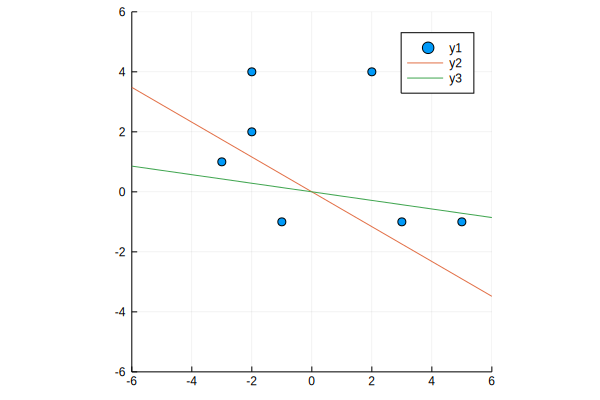

In [34]:
using Plots, LinearAlgebra, SymPy

A = [3 2 -1 -2 -3 5 -2; -1 4 -1 2 1 -1 4]
scatter(A[1,:], A[2,:], xlims = (-6,6), ylims = (-6,6), aspect_ratio = :equal)

a,b = svd(A').V[:,1]

k = -1/7

plot!(-6:6, x->(b/a)*x)
plot!(-6:6,x->k*x)

***Solution:***    
i.
```Julia
A = [3 2 -1 -2 -3 5 -2; -1 4 -1 2 1 -1 4]
scatter(A[1,:], A[2,:])

a,b = svd(A).V[:,1]
plot!(-5:6, x-> (b/a)*x)
```   
<font color = red>the red line</font> represents the line for part (i)   
ii.
```Julia
using SymPy
@vars m b
L = sum((y - m*x - b)^2 for (x,y) in eachrow(A))
h = diff(L,m)
g = diff(L,b)
sympy.solve((h,g),(m,b))
```
we get $m = -\frac{1}{2} b = \frac{7}{2}$, so the line will be y = $-\frac{1}{7}x$   
<font color = green>the green line</font> represents the line for part (ii)   
iii.    
The first line minimizes the sum of squared projection distances from the point to the line, and the second line minimizes the sum of squared vertical distances from the point to the line; thus they are different.


## Problem 4

Find a value of $x$ which is less than $1$ and for which `1 + x + x + x > 1 + 3x` returns `true` . Explain this behavior.

In [39]:
x = 0.5^52
1 + 1.5x + 1.5x + 1.5x > 1 + 4.5x

true

***Expaination:***   
The length of the interval between $[1,2)$ is 1, since there are $2^{-52}$ spaces, thus the length of the smallest space is ${0.5}^{52}$.   
Let x = ${0.5}^{52}$, then $ 1+1.5x $ is unrepresentable by Float64. While rounding up, we follow the rule of always rounf uo to even times, it will round up to $1+2x$ and so on, $1+1.5x+1.5x+1.5x$ rounds up to $1+6x$, thus is greater than $1+4x$ which is the rounded up by $1+4.5x$.  

## Problem 5

Explain why the following function returns a value rather than running forever. Explain why it returns the particular value that it returns.

```Julia
function countdown()
    x = 1.0
    ctr = 0
    while x > 0.0
        x /= 2
        ctr += 1
    end
    ctr
end
```

In [43]:
function countdown()
    x = 1.0
    ctr = 0
    while x > 0.0
        x /= 2
        ctr += 1
    end
    ctr
end
countdown()

1075

***Solution:***   
We use subnormal numbers to represent small numbers, the smallest tick in the interval $(0,2^{-1022})$ is $2^{-1074}$ as $\frac{2^{-1022}}{2^{52}} = 2^{-1074}$. When $x = 1.0$, $ctr = 0$, and then $x = \frac{1}{2}$, $ctr = 1$, and so on...While executing the while loop, the value of ctr is same as the exponential of $\frac{1}{2}$ corresponding to the value of x. When $x = {\frac{1}{2}}^{1074}$, $ctr=1074$.    
Since ${\frac{1}{2}}^{1074} > 0.0$, it will still enter the while loop, and $\frac{{\frac{1}{2}}^{1074}}{2} = 0$ as moving one tick to the left of ${\frac{1}{2}}^{1074}$ is 0.0, at the same time $ctr = 1074+1 = 1075$.   
When $x = 0.0$, the while loop ends and returns 1075 as ctr value.

## Problem 6

Show that an invertible, square matrix and its inverse have the same condition number.

***Solution:***
Since A is invertible, let's say $\mathbf{A} = \mathbf{U}\Sigma\mathbf{V}'$, thus $\mathbf{A}^{-1} = \mathbf{V}\Sigma\mathbf{U}'$ as $\mathbf{U}$ and $\mathbf{V}$ are orthogonal.     
Since $\kappa = \frac{\sigma_{max}}{\sigma_{min}}$, and it is the same for $\mathbf{A}$ and $\mathbf{A}^{-1}$ since $\mathbf{U}\Sigma\mathbf{V}' = \mathbf{V}\Sigma\mathbf{U}'$. Thus $\mathbf{A}$ and $\mathbf{A}^{-1}$ have the same condition number.










***Optional Solution:***    
Say for function $\mathbf{A}{x} = {b}$, the condition number is the maximum ratio of the relative error in $\mathbf{x}$ to the relative error in $\mathbf{b}$   
Let's say the error in $\mathbf{b}$ is $\mathbf{e}$,    
$\frac{\begin{Vmatrix} A^{-1}e \end{Vmatrix}}{\begin{Vmatrix} A^{-1}b \end{Vmatrix}}$ devide by $\frac{\begin{Vmatrix}e\end{Vmatrix}}{\begin{Vmatrix}b\end{Vmatrix}}$,     
which is $\frac{\begin{Vmatrix} A^{-1}e \end{Vmatrix}}{\begin{Vmatrix} A^{-1}b \end{Vmatrix}} \frac{\begin{Vmatrix}b\end{Vmatrix}}{\begin{Vmatrix}e\end{Vmatrix}} = \frac{\begin{Vmatrix} A^{-1}e \end{Vmatrix}}{\begin{Vmatrix}e\end{Vmatrix}} \frac{\begin{Vmatrix}b\end{Vmatrix}}{\begin{Vmatrix} A^{-1}b \end{Vmatrix}}$,    
since we need to find the maximum,     
$\max({\frac{\begin{Vmatrix} A^{-1}e \end{Vmatrix}}{\begin{Vmatrix}e\end{Vmatrix}} \frac{\begin{Vmatrix}b\end{Vmatrix}}{\begin{Vmatrix} A^{-1}b \end{Vmatrix}}})=\max(\frac{\begin{Vmatrix} A^{-1}e \end{Vmatrix}}{\begin{Vmatrix}e\end{Vmatrix}}) \max(\frac{\begin{Vmatrix}b\end{Vmatrix}}{\begin{Vmatrix} A^{-1}b \end{Vmatrix}})$      
$=\max(\begin{Vmatrix}A^{-1}\end{Vmatrix})\max(\frac{\begin{Vmatrix}Ax\end{Vmatrix}}{\begin{Vmatrix}x\end{Vmatrix}})$      
= $\begin{Vmatrix}A^{-1}\end{Vmatrix}\begin{Vmatrix}A\end{Vmatrix}$      
Thus the condition number for $A$ is $\begin{Vmatrix}A^{-1}\end{Vmatrix}\begin{Vmatrix}A\end{Vmatrix}$,      
we apply the same process to the the condition number for $A^{-1}$, and get $\begin{Vmatrix}A\end{Vmatrix}\begin{Vmatrix}A^{-1}\end{Vmatrix}$,      
since $\begin{Vmatrix}A^{-1}\end{Vmatrix}\begin{Vmatrix}A\end{Vmatrix} = \begin{Vmatrix}A\end{Vmatrix}\begin{Vmatrix}A^{-1}\end{Vmatrix}$, we say condition numbers for $A$ and $A^{-1}$ are the same.


## Problem 7

Consider the $n \times n$ Frank matrix $F_n$, defined as shown in the code block below.

```Julia
function frankmatrix(n)
    A = zeros(n,n)
    for i=1:n
        for j=1:n
            if j == i-1
                A[i,j] = n + 1 - i
            elseif j ≥ i
                A[i,j] = n + 1 - j
            end
        end
    end
    A
end
```

Find $F^{-1}_n \mathbf{v}$, where $\mathbf{v} \in \mathbb{R}_n$ has all components equal to 1, by inspection. (Generate $F_n$ for some small values of $n$ and look at it).

Evaluate ` frankmatrix(n) \ ones(n) ` for $n \in {10, 15, 20, 25, 30}$ and calculate the norm of the difference between this numerical solution and the true solution. Compare your result to the product of `eps()` (which equals $2^{−52}$, the gap between $1$ and the nearest representable $64$-bit floating point) and the condition number of $F_n$ (which can be calculated using the function `cond`). Hint: a good way to do this comparison is to plot the log of each of these quantities over the specified range of $n$ values.

Based on your findings, comment on whether the algorithm being used for `\` is stable.

In [1]:
function frankmatrix(n)
    A = zeros(n,n)
    for i=1:n
        for j=1:n
            if j == i-1
                A[i,j] = n + 1 - i
            elseif j ≥ i
                A[i,j] = n + 1 - j
            end
        end
    end
    A
end

frankmatrix (generic function with 1 method)

In [52]:
using LinearAlgebra
result1 = []
for n = 10:5:30
    v1 = inv(frankmatrix(n))*ones(n)
    v2 = frankmatrix(n) \ ones(n)
    diff = v1-v2
    push!(result1, log10(norm(diff)))
end
result1

5-element Array{Any,1}:
 -10.824186284085345   
  -5.219494599242393   
  -0.21504500420476302 
   0.012795374687473795
   0.022829454651752727

In [53]:
result2 = []
for i in 10:5:30
    push!(result2, log10(eps()*cond(frankmatrix(i))))
end
result2

5-element Array{Any,1}:
 -8.198056834972798 
 -2.5164548020316007
  1.8864586222127389
  2.0831544469620638
  2.1830267681996016

In [68]:
import Pkg; Pkg.add("LaTeXStrings")

 Resolving package versions...
  Updating `/opt/julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `/opt/julia/environments/v1.2/Manifest.toml`
 [no changes]


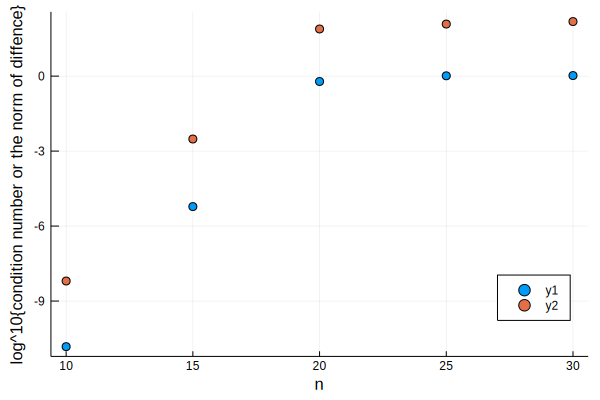

In [80]:
using LaTeXStrings
x_axis = [10,15,20,25,30]
scatter(x_axis, convert(Array{Float64,1},result1),legend = :bottomright)
scatter!(x_axis, convert(Array{Float64,1},result2))
xlabel!("n")
ylabel!("log^10{condition number or the norm of diffence}")

***Solution:***    
The algorithm used for `\` is stable since the norm of error(<font color = blue>y1</font> in the graph) is smaller than the condition nunbers(<font color = red>y2</font> in the graph). Some of the points in the graph have negative y values because the norms of difference and the condition numbers are close to 0, and it brings the log to negative numbers. 

## Problem 8


Consider the function $f(x) = (x^4 - 2x^3 - x^2 + 3x - 1)\operatorname{e}^{-x^2/4}$. Implement the gradient descent algorithm for finding the minimum of this function. 

<img src="polynomial-minimize.svg" style="float: right;" width=450px>

 * If the learning rate is $\epsilon = 0.1$, which values of
      $x_0$ have the property that $f(x_n)$ is close to the global
      minimum of $f$ when $n$ is large? 
 * Is there a starting value $x_0$ between $-2$ and $-1$ and a
      learning rate $\epsilon$ such that the gradient descent
      algorithm does not reach the global minimum of $f$? Use
      the graph for intuition.


## Problem 9

Calculate, by hand, the gradient and Hessian of the function shown below. Show that the values returned by the ForwardDiff package are correct.


In [7]:
import Pkg; Pkg.add("ForwardDiff")

 Resolving package versions...
  Updating `/opt/julia/environments/v1.2/Project.toml`
  [f6369f11] + ForwardDiff v0.10.3
  Updating `/opt/julia/environments/v1.2/Manifest.toml`
 [no changes]


In [19]:
using ForwardDiff
f(x,y) = x^2 + y^2 - 2y
f(v::Vector) = f(v...) # equivalent to f(v[1],v[2]) 
x = [1.5,-3.25]
print(ForwardDiff.gradient(f,x))
ForwardDiff.hessian(f,x)

[3.0, -8.5]

2×2 Array{Float64,2}:
 2.0  0.0
 0.0  2.0

***Solution:***    

$\nabla(f) = \begin{vmatrix}\frac{\partial f}{\partial x}\\\frac{\partial f}{\partial y}\end{vmatrix} = \begin{vmatrix}2x\\2y-2\\\end{vmatrix} = \begin{vmatrix}3\\-8.5\\\end{vmatrix}$    
$H_{f} = \begin{vmatrix}\frac{\partial^2 f}{\partial x^2} & \frac{\partial^2 f}{\partial x\partial y}\\\frac{\partial^2 f}{\partial y\partial x} & \frac{\partial^2 f}{\partial y^2}\end{vmatrix} = \begin{vmatrix}2&0\\0&2\\\end{vmatrix}$

## Problem 10

Consider the following PRNG (which was actually widely used in the
early 1970s): we begin with an odd positive integer $a_1$ less than
$2^{31}$ and for all $n \geq 2$, we define $a_n$ to be the
remainder when dividing $65539a_{n-1}$ by $2^{31}$.

Use Julia to calculate $9a_{3n+1} - 6 a_{3n+2} + a_{3n+3}$ for the
first $10^6$ values of $n$, and show that there are only
$\textit{15}$ unique values in the resulting list (!). Explain what
you would see if you plotted many points of the form
$(a_{3n+1},a_{3n+2},a_{3n+3})$ in three-dimensional space.

In [48]:
a = [rand(1:2:2^31)]
for i = 1 : 4000000
    push!(a, mod(65539a[end], 2^31))
end

l = []
for i = 1 : 1000000
    push!(l, 9 * a[3i+1] - 6 * a[3i+2] + a[3i+3])
end
length(Set(l))

15

***Solution:***
since f(x,y,z) = 9x - 6y + z, and there are only 15 unique values for the f, thus we could have 15 planes in the 3D space. 